In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
tf.constant([1])

<tf.Tensor: id=0, shape=(1,), dtype=int32, numpy=array([1])>

In [5]:
feats = tf.constant([[53,65], [45,36]])
params = tf.constant([[5],[20]])

In [6]:
mults = tf.matmul(feats, params)

In [7]:
mults.numpy()

array([[1565],
       [ 945]])

In [8]:
tf.reduce_sum(feats, 0).numpy()

array([ 98, 101])

In [9]:
tf.reduce_sum(feats, 1).numpy()

array([118,  81])

In [10]:
x = tf.Variable(-1.0)

# Gradient Tape

In [14]:
with tf.GradientTape() as tape:
    
    tape.watch(x)
    y = tf.multiply(x, x)
    print('x:', x)
    print('y:', y)

x: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-1.0>
y: tf.Tensor(1.0, shape=(), dtype=float32)


In [13]:
g = tape.gradient(y, x)
print(g.numpy())

-2.0


# Images

In [33]:
gray = tf.random.uniform([2,2], maxval=255, dtype='int32')

In [34]:
gray.numpy()

array([[ 73, 212],
       [100, 139]])

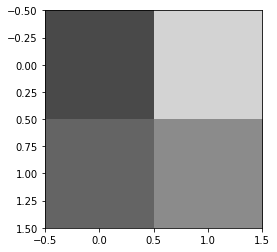

In [35]:
plt.imshow(gray.numpy(), cmap='gray', vmin=0, vmax=255)
plt.show()

### Reshape

In [36]:
gray = tf.reshape(gray, [2*2, 1])

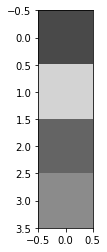

In [38]:
plt.imshow(gray.numpy(), cmap='gray', vmin=0, vmax=255)
plt.show()

In [4]:
df = process.Data('train.csv').return_data()
df

,Survived,Age,Fare,Master.,Miss.,Mr.,Mrs.,Other,A_CABIN,B_CABIN,...,class_2,class_3,female,male,C,Q,S,FamilyAboard,IsAlone,InCabin
0,0,22.000000,7.2500,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,1,False,False
1,1,38.000000,71.2833,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,False,True
2,1,26.000000,7.9250,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,True,False
3,1,35.000000,53.1000,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,False,True
4,0,35.000000,8.0500,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,True,False
5,0,30.726645,8.4583,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,True,False
6,0,54.000000,51.8625,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,True,True
7,0,2.000000,21.0750,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,4,False,False
8,1,27.000000,11.1333,0,0,0,1,0,0,0,...,0,1,1,0,0,0,1,2,False,False
9,1,14.000000,30.0708,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,False,False


In [5]:
#fare = tf.cast(df['Fare'], tf.float32)
actual = tf.cast(df['Survived'], tf.bool)

In [6]:
vals = tf.constant(np.array(df.drop(['Survived'], axis=1)), tf.float32)

In [29]:
dense1 = tf.keras.layers.Dense(8, activation='sigmoid')(vals)
dense2 = tf.keras.layers.Dense(4, activation='relu')(dense1)
predictions = tf.keras.layers.Dense(2, activation='sigmoid')(dense2)

In [30]:
predictions

<tf.Tensor: id=278, shape=(889, 2), dtype=float32, numpy=
array([[0.47194862, 0.39555007],
       [0.4878659 , 0.43510947],
       [0.47155055, 0.39379117],
       ...,
       [0.490262  , 0.4432823 ],
       [0.49170542, 0.4481255 ],
       [0.4713075 , 0.39324272]], dtype=float32)>

In [11]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout

In [133]:
vals.shape

TensorShape([891, 25])

In [ ]:
keras.

In [12]:
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation='sigmoid', input_shape=(25,), 
                             kernel_initializer='normal', bias_initializer='zeros'))
for i in range (0, 8):
    model.add(keras.layers.Dense(units=64, kernel_initializer='normal',
                     bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Dropout(.25))
#model.add(keras.layers.Dense(12, activation='softmax'))
model.add(keras.layers.Dense(units=1))
model.add(Activation('linear'))
#model.add(keras.layers.Dense(2, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               3328      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [13]:
model.fit(vals, actual, epochs=100, validation_split=0.20)

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 3s 4ms/sample - loss: 0.2747 - accuracy: 0.5913 - val_loss: 0.2150 - val_accuracy: 0.6425
Epoch 2/100
712/712 [==============================] - 0s 175us/sample - loss: 0.2354 - accuracy: 0.6180 - val_loss: 0.1997 - val_accuracy: 0.6927
Epoch 3/100
712/712 [==============================] - 0s 176us/sample - loss: 0.2270 - accuracy: 0.6320 - val_loss: 0.1942 - val_accuracy: 0.7318
Epoch 4/100
712/712 [==============================] - 0s 177us/sample - loss: 0.2164 - accuracy: 0.6531 - val_loss: 0.1813 - val_accuracy: 0.7263
Epoch 5/100
712/712 [==============================] - 0s 171us/sample - loss: 0.2206 - accuracy: 0.6587 - val_loss: 0.1749 - val_accuracy: 0.7318
Epoch 6/100
712/712 [==============================] - 0s 181us/sample - loss: 0.1996 - accuracy: 0.6966 - val_loss: 0.1622 - val_accuracy: 0.7542
Epoch 7/100
712/712 [==============================] - 0s 178us/sample - l

712/712 [==============================] - 0s 194us/sample - loss: 0.1396 - accuracy: 0.8244 - val_loss: 0.1011 - val_accuracy: 0.8715
Epoch 57/100
712/712 [==============================] - 0s 180us/sample - loss: 0.1403 - accuracy: 0.8202 - val_loss: 0.1005 - val_accuracy: 0.8659
Epoch 58/100
712/712 [==============================] - 0s 187us/sample - loss: 0.1414 - accuracy: 0.8202 - val_loss: 0.0999 - val_accuracy: 0.8715
Epoch 59/100
712/712 [==============================] - 0s 180us/sample - loss: 0.1363 - accuracy: 0.8188 - val_loss: 0.1149 - val_accuracy: 0.8436
Epoch 60/100
712/712 [==============================] - 0s 175us/sample - loss: 0.1415 - accuracy: 0.8146 - val_loss: 0.1030 - val_accuracy: 0.8771
Epoch 61/100
712/712 [==============================] - 0s 182us/sample - loss: 0.1417 - accuracy: 0.8160 - val_loss: 0.1023 - val_accuracy: 0.8771
Epoch 62/100
712/712 [==============================] - 0s 168us/sample - loss: 0.1411 - accuracy: 0.8146 - val_loss: 0.0999 

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [15]:
test = process.Data('test.csv').return_data()

In [20]:
preds = model.predict_classes(tf.constant(np.array(test), dtype=np.float))

In [49]:
test = pd.read_csv('test.csv')
test = pd.concat([test.PassengerId, pd.DataFrame(preds),], axis=1)
test = test.rename(columns={0:'Survived'})

In [51]:
test.to_csv('submission.csv', index=False)